# **Pertemuan #13 - Covariance and Correlation**

Introduction to Probability Course - Sekolah Data - Pacmann Academy

**Outline**

1. Review Covariance and Correlation
2. Case 1 - Biaya Periklanan dan Tingkat Penjualan
3. Case 2 - Merokok dan Daya Tahan Jantung
4. Case 3 - Luas Tanah dan Harga Jual

## **Review Covariance and Correlation**


# Covariance

Dari materi yang telah dipelajari di video:
- Kovarians memberi kita informasi tentang dependencies antara dua variabel random.
- Kovarians dapat dicari dengan menghitung:
$$ \ Cov(x,y)=\frac{\sum_{i=1}^{n}(x_{i}-\mu _{x})(y_{i}-\mu _{y})}{n-1} $$

- Jika didapatkan angka kovarians positif menunjukkan bahwa data independen dan data dependen cenderung berubah secara bersamaan ke arah yang sama. Kovarians negatif menunjukkan bahwa data cenderung berubah secara bersamaan ke arah yang berlawanan.
- Jika didapatkan angka kovarians mendekati 0, dapat disimpulkan bahwa data tersebut relatif tidak berhubungan. Artinya, kenaikan nilai pada yang satu bisa meningkatkan atau tidak meningkatkan nilai pada yang lain.

#Correlation

- Koefisien Korelasi merupakan nilai yang menunjukkan kekuatan dependencies antara dua variabel random.
- Korelasi dapat dicari dengan menghitung : $$ \rho (X,Y)=\frac{Cov(X,Y)}{\sqrt{\sigma _{X}^{2}}\sqrt{\sigma _{Y}^{2}}} $$
- Koefisien Korelasi selalu bernilai $ -1 \leq\rho \leq 1 $ , ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.  



- Kita perlu memanggil library dan fungsi yang diperlukan untuk menjalankan code dalam notebook ini, yang meliputi kebutuhan:
  - Menghitung Kovarians
  - Menghitung Korelasi

In [2]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
import pandas as pd
import numpy as np
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import ipywidgets as widgets
from ipywidgets import interact

In [4]:
from src.module_python_13 import heatmap_correlation
from src.module_python_13 import stripplot_boxplot
from src.module_python_13 import plot_randomness
from src.module_python_13 import plotter_corr
from src.module_python_13 import playground_corr

In [5]:
playground_corr()

Masukkan 'Randomness':


interactive(children=(SelectionSlider(continuous_update=False, description='randomness:', index=9, options=(-1…

Sekarang, mari kita coba bandingkan nilai dari berbagai macam nilai "randomness".

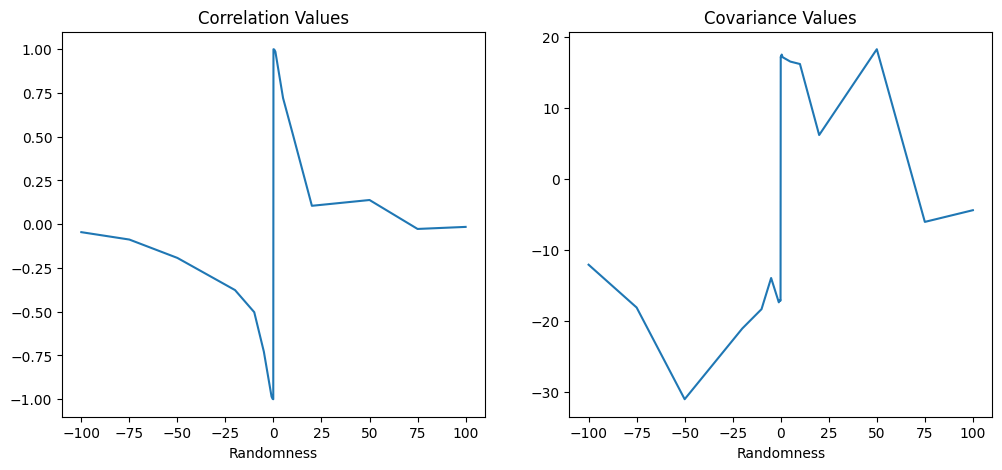

In [6]:
plot_randomness()

Dapat dilihat bahwa nilai korelasi memiliki nilai maksimal 1 dan asimtotik di kedua sisi kanan dan kiri.

## **Study Case 1: Hubungan Nilai Biaya Periklanan dengan Tingkat Penjualan dari Sebuah Koperasi**
___

Dalam kasus ini, diketahui data suatu penelitian terhadap hubungan antara biaya periklanan dengan tingkat penjualan dari sebuah koperasi adalah sebagai berikut: (dalam ribuan rupiah)

<center>

|Biaya Periklanan|Tingkat Penjualan|
|:-:|:-:|
|50|40|
|51|46|
|52|44|
|53|55|
|54|49|

</center>

a) Berapakah Kovarians antara biaya periklanan dan tingkat penjualan?

b) Apakah data biaya periklanan berhubungan dengan data tingkat penjualan?

c) Berapakah korelasi antara biaya periklanan dan tingkat penjualan? kemudian simpulkan

In [7]:
df = pd.DataFrame({
    'Biaya Periklanan':[50, 51, 52, 53, 54],
    'Tingkat Penjualan':[40, 46, 44, 55, 49]
})

df

,Biaya Periklanan,Tingkat Penjualan
0,50,40
1,51,46
2,52,44
3,53,55
4,54,49


Menggunakan Seaborn untuk menunjukkan distribusi nilai pada kolom Biaya Periklanan dan Tingkat Penjualan

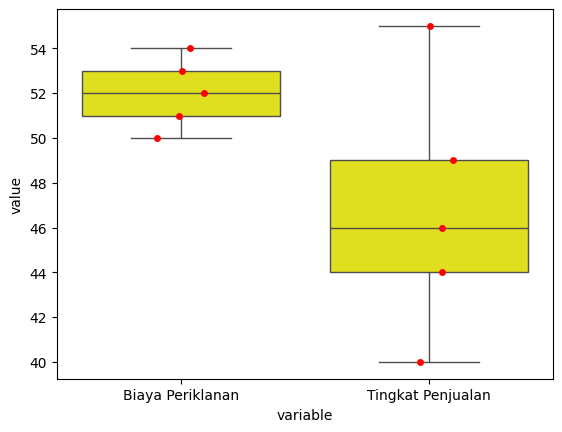

In [8]:
stripplot_boxplot(df)

Dari gambar di atas dapat kita ketahui bahwa nilai pada tingkat penjualan lebih tersebar dibandingkan dengan nilai pada Biaya Periklnan. Dengan demikian varians Tingkat Penjualan lebih besar dibandingkan dengan Biaya Periklanan. Perhitungan Varians sebegai berikut.

In [9]:
np.var(df[['Biaya Periklanan', 'Tingkat Penjualan']], ddof=1)

c:\Users\farha\Documents\pacmann\pacmann_env\lib\site-packages\numpy\_core\fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Biaya Periklanan      2.5
Tingkat Penjualan    31.7
dtype: float64

Kovarians digunakan untuk melihat bagaimana kolom berhubungan satu sama lain (mengukur hubungan antara dua variabel random)

Sebelumnya kita akan membuat visualisasi scatter plot untuk melihat bagaimana Biaya Periklanan dan Tingkat Penjualan berhubungan satu sama lain

Text(0, 0.5, 'Tingkat Penjualan')

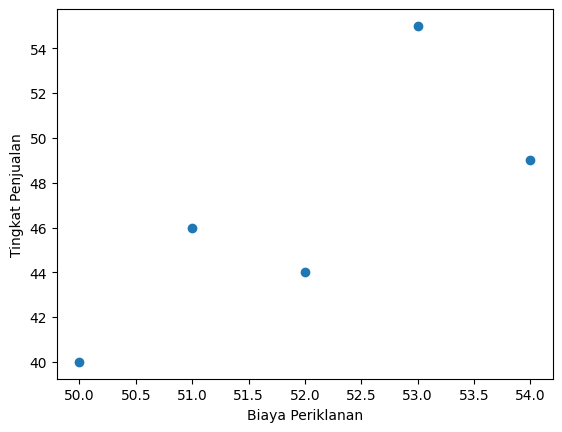

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['Biaya Periklanan'], df['Tingkat Penjualan'])
plt.xlabel('Biaya Periklanan')
plt.ylabel('Tingkat Penjualan')

Numpy memiliki fungsi cov() untuk menghitung kovarians dua variabel random secara langsung sebegai berikut.

In [11]:
np.cov(df['Biaya Periklanan'], df['Tingkat Penjualan'])

array([[ 2.5 ,  6.75],
       [ 6.75, 31.7 ]])

Telah didapatkan kovarian 6.75, sehingga bisa disimpulkan bahwa data biaya periklanan dan data tingkat penjualan saling berhubungan. Namun dengan kovarians tidak mudah ditafsirkan secara kualitatif, sehingga kita perlu menghitung korelasi.

Korelasi digunakan untuk mengukur kekuatan dan arah hubungan linier antara dua variabel random. Dengan library pandas kita dapat menggunakan fungsi corr() untuk menghitung korelasi antara Biaya Periklanan dan Tingkat Penjualan sebagai berikut.

In [12]:
df[['Biaya Periklanan', 'Tingkat Penjualan']].corr()

,Biaya Periklanan,Tingkat Penjualan
Biaya Periklanan,1.000000,0.758236
Tingkat Penjualan,0.758236,1.000000


Nilai diagonal 1 menunjukkan korelasi setiap kolom dengan dirinya sendiri. Nilai 0.75 merupakan koefisien korelasi Pearson antara Biaya Periklanan dan Tingkat Penjualan. Sehingga dari hasil perhitungan tersebut kita dapatkan korelasi sebesar 0.75, artinya korelasi positif. Korelasi positif menunjukkan bahwa kenaikan satu variabel menyebabkan penambahan nilai pada variabel lainnya. Agar lebih jelas maka akan dibuat visualisasi sebagai berikut.

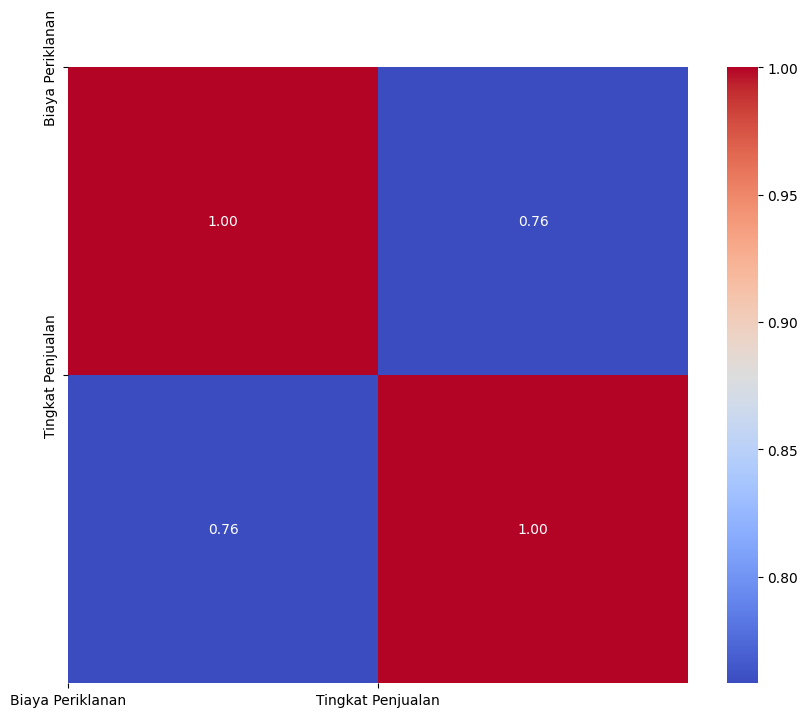

In [13]:
corr = df.corr()
heatmap_correlation(corr)

Dari gambar di atas maka dapat kita simpulkan bahwa korelasi bernilai mendekati 1 berarti bahwa Biaya Periklnan dan Tingkat Penjualan berkorelasi positif. Korelasi positif menunjukkan bahwa kenaikan satu variabel menyebabkan penambahan nilai pada variabel lainnya.

## **Study Case 2: Hubungan Rokok dengan Daya Tahan Jantung**
___

Kita coba bahas kasus yang telah dijelaskan pada slide dalam video.

Akan dilakukan investigasi hubungan antara merokok dan daya tahan jantung. Sehingga dilakukan survey ke sekelompok orang mengenai kebiasaan merokok dan sekaligus mengukur daya tahan jantung, dan didapatkan data sebagai berikut.

<center>

|Rokok (X)|Daya Tahan Jantung (Y)|
|:--:|:--:|
|0|45|
|5|42|
|10|33|
|15|31|
|20|29|

</center>

a) Berapakah kovarians antara rokok dan daya tahan jantung?

b) Apakah terdapat hubungan antara merokok dan daya tahan jantung?

c) Berapakah korelasi antara rokok dan daya tahan jantung? kemudian simpulkan

In [14]:
df = pd.DataFrame({
    'Rokok':[0, 5, 10, 15, 20],
    'Daya Tahan Jantung':[45, 42, 33, 31, 29]
})

df

,Rokok,Daya Tahan Jantung
0,0,45
1,5,42
2,10,33
3,15,31
4,20,29


Menggunakan Seaborn untuk menunjukkan distribusi nilai pada kolom Rokok dan Daya Tahan Jantung

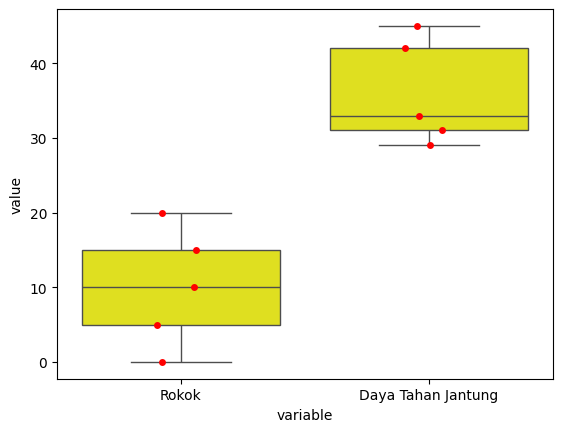

In [15]:
stripplot_boxplot(df)

In [16]:
np.var(df[['Rokok', 'Daya Tahan Jantung']], ddof=1)

c:\Users\farha\Documents\pacmann\pacmann_env\lib\site-packages\numpy\_core\fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Rokok                 62.5
Daya Tahan Jantung    50.0
dtype: float64

Kovarians digunakan untuk melihat bagaimana kolom berhubungan satu sama lain (mengukur hubungan antara dua variabel random)

Sebelumnya kita akan membuat visualisasi scatter plot untuk melihat bagaimana Rokok dan Daya Tahan Jantung berhubungan satu sama lain

Text(0, 0.5, 'Daya Tahan Jantung')

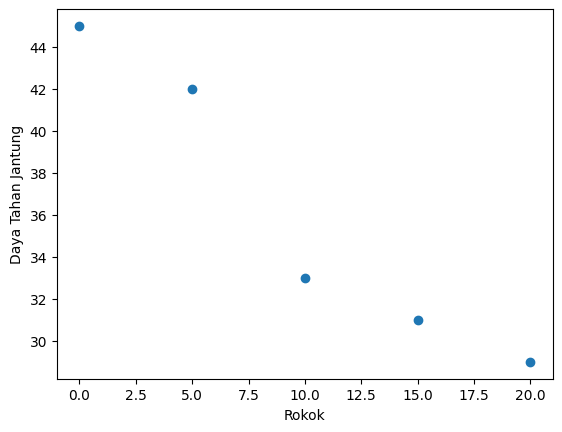

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df['Rokok'], df['Daya Tahan Jantung'])
plt.xlabel('Rokok')
plt.ylabel('Daya Tahan Jantung')

Dari gambar di atas tampak bahwa terdapat trend saat Rokok meningkat Daya Tahan Jantung Menurun, begitu juga sebaliknhya. Sehingga dapat diketahui bahwa Rokok dan Daya Tahan Jantung memiliki kovarians negatif. Kovarians negatif menunjukkan bahwa kedua variabel senderung menjauh satu sama lain.

Numpy memiliki fungsi cov() untuk menghitung kovarians antara dau variabel random secara langsung sebagai berikut.

In [18]:
np.cov(df['Rokok'], df['Daya Tahan Jantung'])


array([[ 62.5 , -53.75],
       [-53.75,  50.  ]])

Telah didapatkan kovarians -53.75, sehingga bisa disimpulkan bahwa data rokok dan data daya tahan jantung saling berhubungan. Namun dengan kovarians tidak mudah ditafsirkan secara kualitatif, sehingga kita perlu menghitung korelasi.

Korelasi digunakan untuk mengukur kekuatan dan arah hubungan linier antara dua variabel random. Dengan library pandas kita dapat menggunakan fungsi corr() untuk menghitung korelasi antara Biaya Periklanan dan Tingkat Penjualan sebagai berikut.

In [19]:
df[['Rokok', 'Daya Tahan Jantung']].corr()

,Rokok,Daya Tahan Jantung
Rokok,1.000000,-0.961509
Daya Tahan Jantung,-0.961509,1.000000


Nilai diagonal 1 menunjukkan korelasi setiap kolom dengan dirinya sendiri. Nilai -0.96 merupakan koefisien korelasi Pearson antara Rokok dan Daya Tahan Jantung. Sehingga dari hasil perhitungan tersebut kita dapatkan korelasi sebesar -0.96, artinya korelasi negatif. Korelasi negatif menunjukkan bahwa data cenderung berubah secara bersamaan ke arah yang berlawanan. Peningkatan pada satu nilai akan menghasilkan penurunan pada nilai yang lain. Agar lebih jelas maka akan dibuat visualisasi sebagai berikut.

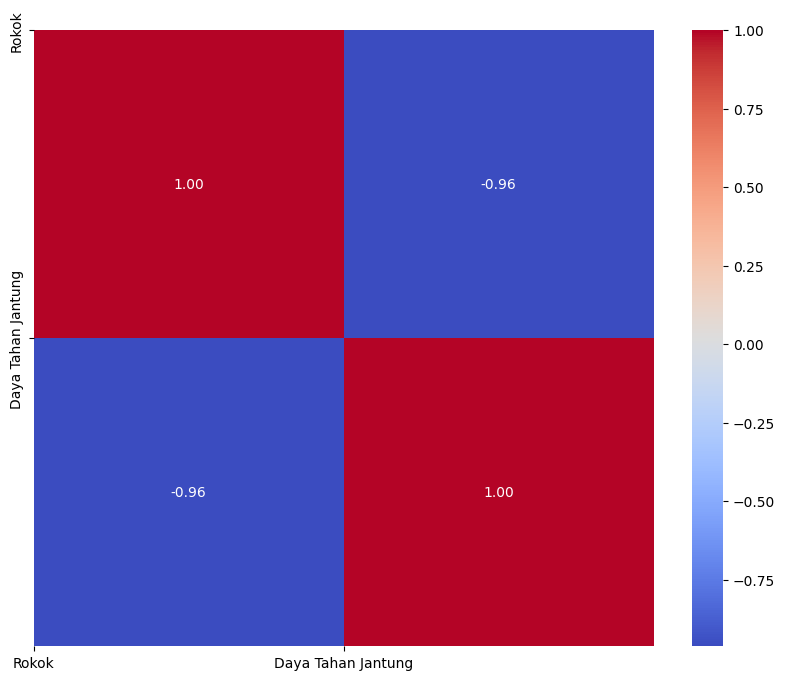

In [20]:
corr = df.corr()
heatmap_correlation(corr)

Dari gambar di atas maka dapat kita simpulkan bahwa korelasi bernilai mendekati -1 berarti bahwa Rokok dan Daya Tahan Jantung berkorelasi negatif. Kenaikan satu variabel menyebabkan penurunan nilai dari variabel lainnya. Begitu juga sebaliknya, semakin kecil nilai suatu variabel, semakin besar nilai variabel lainnya.

## **Study Case 3: Hubungan Luas Tanah dan Harga Jual**
___

Dari materi yang sudah dipelajari di video:

Anda sedang menganalisis angka penjualan rumah di suatu wilayah. Data yang Anda peroleh adalah luas tanah dan harga penjualannya. Perhatikan tabel berikut ini.

<center>

|Luas Tanah (X)|Harga Jual (Y)|
|:--:|:--:|
|2.260|300.000.000|
|2.750|425.000.000|
|2.840|463.000.000|
|2.111|225.000.000|
|3.225|621.000.000|
|2.511|392.000.000|

</center>

a) Berapakah kovarians antara rokok dan daya tahan jantung?

b) Apakah terdapat hubungan antara merokok dan daya tahan jantung?

c) Berapakah korelasi antara luas tanah dan harga jual? kemudian simpulkan

In [21]:
df = pd.DataFrame({
    'Luas Tanah':[2260, 2750, 2840, 2111, 3225, 2511],
    'Harga Jual':[300000000, 425000000, 463000000, 225000000, 621000000, 392000000]
})

df

,Luas Tanah,Harga Jual
0,2260,300000000
1,2750,425000000
2,2840,463000000
3,2111,225000000
4,3225,621000000
5,2511,392000000


Menggunakan Seaborn untuk menunjukkan distribusi nilai pada kolom Luas Tanah dan Harga Jual

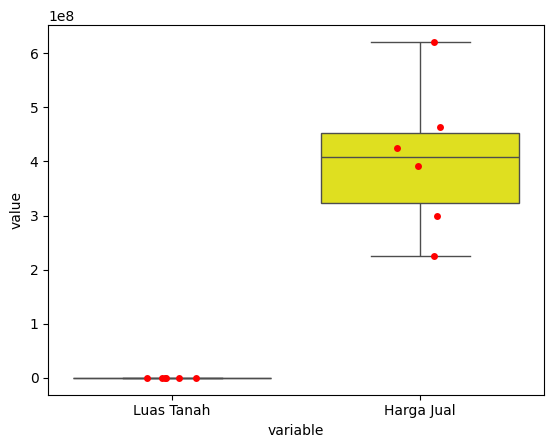

In [22]:
stripplot_boxplot(df)

Dari gambar di atas dapat kita ketahui bahwa nilai pada Harga Jual lebih tersebar dibandingkan dengan nilai pada Luas Tanah. Dengan demikian varians Harga Jual lebih besar dibandingkan dengan Luas Tanah. Perhitungan Varians sebegai berikut.

In [23]:
np.var(df[['Luas Tanah', 'Harga Jual']], ddof=1)

c:\Users\farha\Documents\pacmann\pacmann_env\lib\site-packages\numpy\_core\fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Luas Tanah    1.663598e+05
Harga Jual    1.880227e+16
dtype: float64

Kovarians digunakan untuk melihat bagaimana kolom berhubungan satu sama lain (mengukur hubungan antara dua variabel random)

Sebelumnya kita akan membuat visualisasi scatter plot untuk melihat bagaimana Luas Tanah dan Harga Jual berhubungan satu sama lain

Text(0, 0.5, 'Harga Jual')

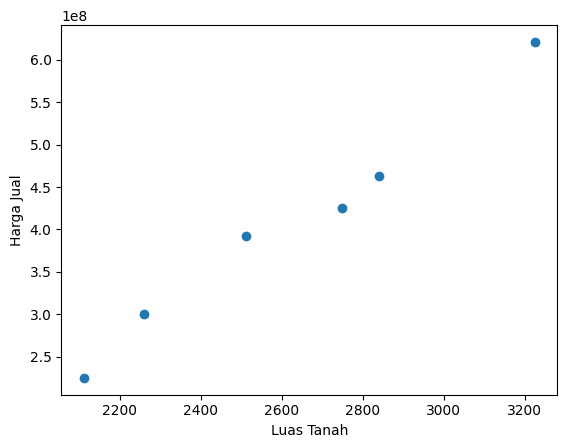

In [24]:
import matplotlib.pyplot as plt
plt.scatter(df['Luas Tanah'], df['Harga Jual'])
plt.xlabel('Luas Tanah')
plt.ylabel('Harga Jual')

Numpy memiliki fungsi cov() untuk menghitung kovarians dua variabel random secara langsung sebegai berikut.

In [25]:
import numpy
np.cov(df['Luas Tanah'], df['Harga Jual'])

array([[1.66359767e+05, 5.53723333e+10],
       [5.53723333e+10, 1.88022667e+16]])

Telah didapatkan kovarians 5.53, sehingga bisa disimpulkan bahwa data luas tanah dan harga jual saling berhubungan. Namun dengan kovarians tidak mudah ditafsirkan secara kualitatif, sehingga kita perlu menghitung korelasi.

Korelasi digunakan untuk mengukur kekuatan dan arah hubungan linier antara dua variabel random. Dengan library pandas kita dapat menggunakan fungsi corr() untuk menghitung korelasi antara Luas Tanah dan Harga Jual sebagai berikut.

In [26]:
df[['Luas Tanah', 'Harga Jual']].corr()

,Luas Tanah,Harga Jual
Luas Tanah,1.000000,0.990065
Harga Jual,0.990065,1.000000


Nilai diagonal 1 menunjukkan korelasi setiap kolom dengan dirinya sendiri.Nilai 0.99 merupakan koefisien korelasi Pearson antara Luas Tanah dan Harga Jual.Sehingga dari hasil perhitungan tersebut kita dapatkan korelasi sebesar 0.99, artinya korelasi positif. Korelasi positif menunjukkan bahwa kenaikan satu variabel menyebabkan penambahan nilai pada variabel lainnya.Agar lebih jelas maka akan dibuat visualisasi sebagai berikut.


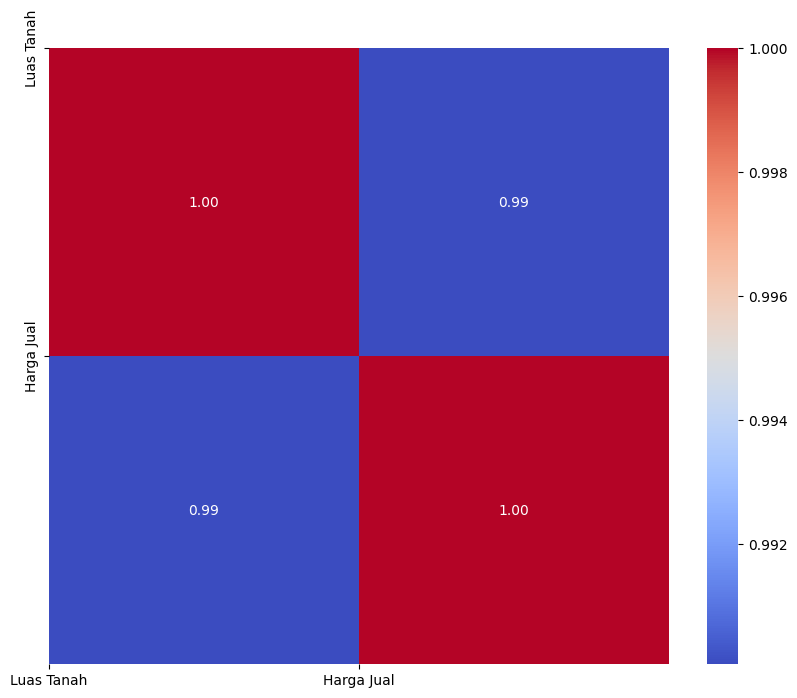

In [27]:
corr = df.corr()
heatmap_correlation(corr)

Dari gambar di atas maka dapat kita simpulkan bahwa korelasi bernilai mendekati 1 berarti bahwa Luas Tanah dan Harga Jual berkorelasi positif. Korelasi positif menunjukkan bahwa kenaikan satu variabel menyebabkan penambahan nilai pada variabel lainnya.